### Credits https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

### Credits : https://gist.github.com/danielmk

Matplotlib's animation base class deals with the animation part. It provides a framework around which the animation functionality is built. There are two main interfaces to achieve that using:

* `FuncAnimation` Makes an animation by repeatedly calling a function func.
* `ArtistAnimation`Animation using a fixed set of Artist objects.

However,  out of the two, FuncAnimation is the most convenient one to use. You can read more about them in the documentation since we will only concern ourselves with the FuncAnimation tool.

## Requirements

Modules including 'numpy' and 'matplotlib' should be installed.
To save the animation on your system as mp4 or gif, [ffmpeg] (https://www.ffmpeg.org/) or [imagemagick](https://sourceforge.net/projects/imagemagick/files/) is required to be installed.

### Animation 1 : Moving Sine Wave

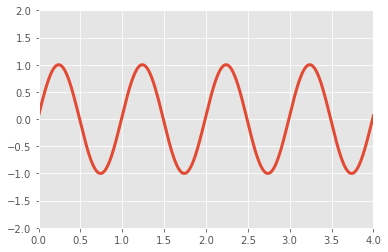

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import IFrame
# plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))

line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    
    line.set_data(x, y)
    
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

In [10]:
line

In [11]:
IFrame('sine_wave.gif', width=800, height=400)

### Animation 2: Moving Sine Wave Modified

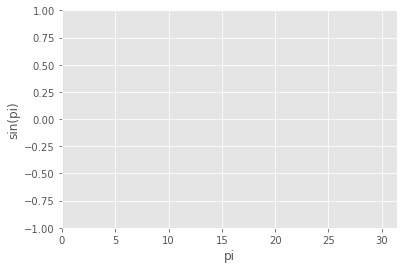

In [12]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

x = np.arange(0, 10*np.pi, 0.01)
y = np.sin(x)

fig = plt.figure()
ax = plt.subplot(1, 1, 1)

data_skip = 50


def init_func():
    ax.clear()
    plt.xlabel('pi')
    plt.ylabel('sin(pi)')
    plt.xlim((x[0], x[-1]))
    plt.ylim((-1, 1))


def animate(i):
    ax.plot(x[i:i+data_skip], y[i:i+data_skip], color='k')
    ax.scatter(x[i], y[i], marker='o', color='r')



anim = FuncAnimation(fig,
                     animate,
                     frames=np.arange(0, len(x), data_skip),
                     init_func=init_func,
                     interval=200)

anim.save('test.gif', writer = 'imagemagick')

In [13]:
IFrame('test.gif', width=800, height=400)

### Animation 3: Multiple Moving Sine Wave 

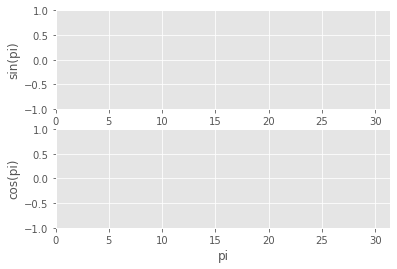

In [14]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

x = np.arange(0, 10*np.pi, 0.01)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig = plt.figure()
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

data_skip = 50


def init_func():
    ax1.clear()
    ax2.clear()
    ax1.set_xlabel('pi')
    ax1.set_ylabel('sin(pi)')
    ax2.set_xlabel('pi')
    ax2.set_ylabel('cos(pi)')
    ax1.set_xlim((x[0], x[-1]))
    ax1.set_ylim((-1, 1))
    ax2.set_xlim((x[0], x[-1]))
    ax2.set_ylim((-1, 1))


def animate(i):
    # ax.clear()
    ax1.plot(x[i:i+data_skip], y_sin[i:i+data_skip], color='k')
    ax1.scatter(x[i], y_sin[i], marker='o', color='r')
    
    ax2.plot(x[i:i+data_skip], y_cos[i:i+data_skip], color='k')
    ax2.scatter(x[i], y_cos[i], marker='o', color='r')


anim = FuncAnimation(fig,
                     animate,
                     frames=np.arange(0, len(x), data_skip),
                     init_func=init_func,
                     interval=1)

anim.save('sin_cos.mp4', dpi=150, fps=10, writer='ffmpeg')

In [15]:
IFrame('sin_cos.mp4', width=800, height=400)

### Animation 4: Trend Line 

fig size: 72.0 DPI, size in inches [6. 4.]


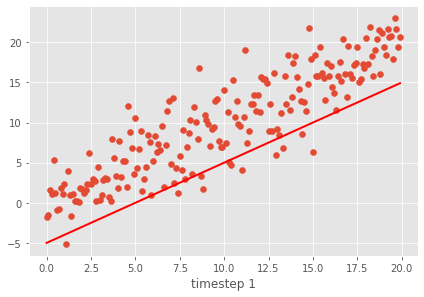

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
fig, ax = plt.subplots()
fig.set_tight_layout(True)
 
print('fig size: {0} DPI, size in inches {1}'.format(fig.get_dpi(), fig.get_size_inches()))
 
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x-5, 'r-', linewidth=2)
 
def animate(i):
    label = 'timestep {0}'.format(i + 1)
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, animate, repeat=True, frames=np.arange(0, 10), interval=500)
 
plt.show()
anim.save('test.gif', writer = 'imagemagick')

In [17]:
IFrame('test.gif', width=800, height=400)

### Animation 5: A Growing Coil

There is a nice example of creating shapes at [GeeksforGeeks](https://www.geeksforgeeks.org/graph-plotting-python-set-3/). Let's now create a moving coil which slowly unwinds, with the help of animation class of matplotlib. The code is quite similar to the sine wave plot with minor adjustments.

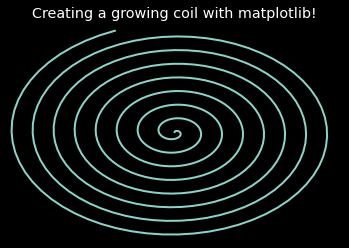

In [18]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 

line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# t is a parameter 
	t = 0.1*i 
	
	# x, y values to be plotted 
	x = t*np.sin(t) 
	y = t*np.cos(t) 
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
    
	line.set_data(xdata, ydata) 
    
	return line, 
	
# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='imagemagick') 

In [19]:
IFrame('coil.gif', width=800, height=300)

### Animation 6: Live Updating Graphs


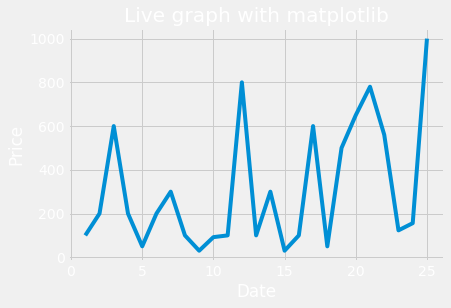

In [20]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('fivethirtyeight')

fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	
	
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()

## Animations using Celluloid Module

[Celluloid](https://github.com/jwkvam/celluloid) is a Python module that simplifies the process of creating animations in matplotlib. This library creates a matplotlib figure and creates a 'Camera' from it. It then reuses figure and after each frame is created, take a snapshot with the camera. Finally, an animation is created with all the captured frames.

In [21]:
# # Installation
# !pip install celluloid

### Animation 7: Minimal

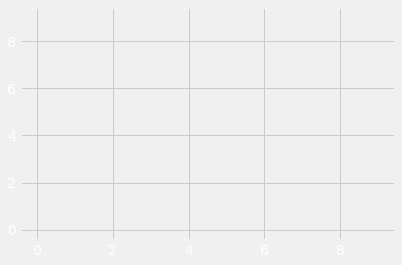

In [22]:
from matplotlib import pyplot as plt
from celluloid import Camera

plt.style.use('seaborn-pastel')

fig = plt.figure()
camera = Camera(fig)

for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
    
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')

In [23]:
IFrame('celluloid_minimal.gif', width=800, height=350)

### Animation 8: Subplots

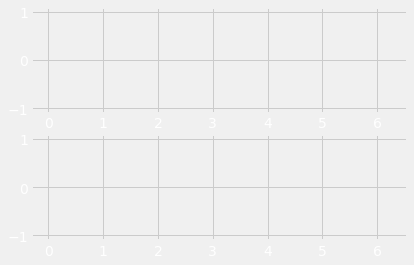

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)

for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_subplots.gif', writer = 'imagemagick')

In [25]:
IFrame('celluloid_subplots.gif', width=800, height=350)

### Animation 9: Legends

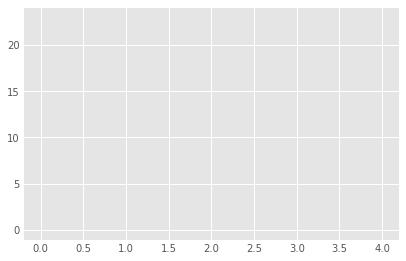

In [26]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
plt.style.use('ggplot')

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
    
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick')

In [27]:
IFrame('celluloid_legends.gif', width=800, height=350)